In [2]:
import pickle

import torch
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.manifold import TSNE
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import FastICA

# Get authors from e-mails

In [3]:
with open("../../w3c-emails/emails.pkl", "rb") as handle:
    senders = [e.sender for e in pickle.load(handle)]

In [4]:
id_origin = list(enumerate(set(senders)))
inds_to_sender = dict(id_origin)
sender_to_inds = {p: i for i, p in id_origin}

# senders_ids = [sender_to_inds[p] for p in senders]

i = 10
sender_counts = Counter(senders[:5000])
inds_to_sender = {i:p for p, i in sender_counts.most_common(10)}
sender_to_inds = dict(sender_counts.most_common(10))

senders_ids = np.asarray([sender_to_inds[p] if p in sender_to_inds else 0 for p in senders[:5000]])

# Load E-mail Embeddings and transform into Matrix

In [5]:
with open("vectors.pkl", "rb") as handle:
    mail_vecs = pickle.load(handle)

In [6]:
mail_vecs_averaged = [torch.stack(vs).mean(0) for vs in mail_vecs]
mails_stacked = torch.stack(mail_vecs_averaged)

# t-SNE

In [17]:
tsne =  TSNE(n_components=2, random_state=13, verbose=1)

In [18]:
vecs_2d =  tsne.fit_transform(mails_stacked)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.284s...
[t-SNE] Computed neighbors for 5000 samples in 25.516s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.291550
[t-SNE] KL divergence after 1000 iterations: 1.436727


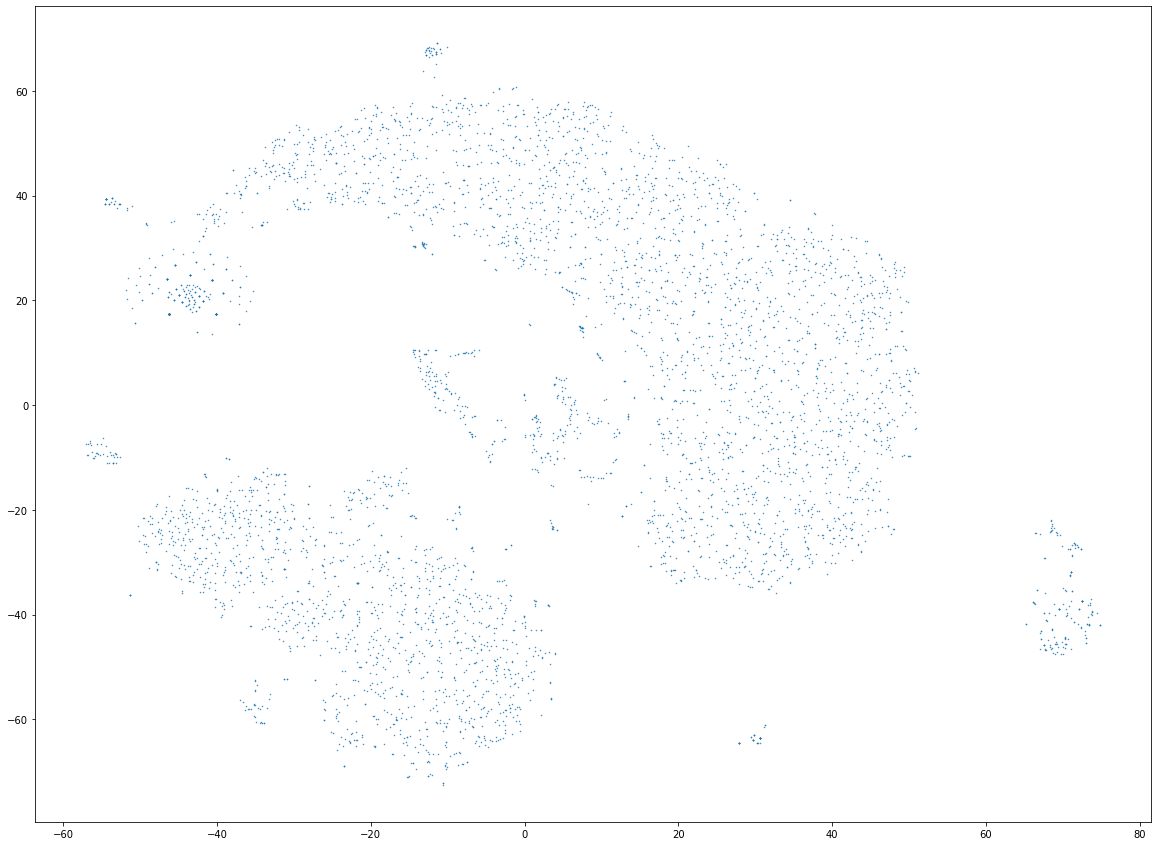

In [19]:
plt.figure(figsize=(20, 15))
plt.scatter(vecs_2d[:, 0], vecs_2d[:, 1], s=0.2)

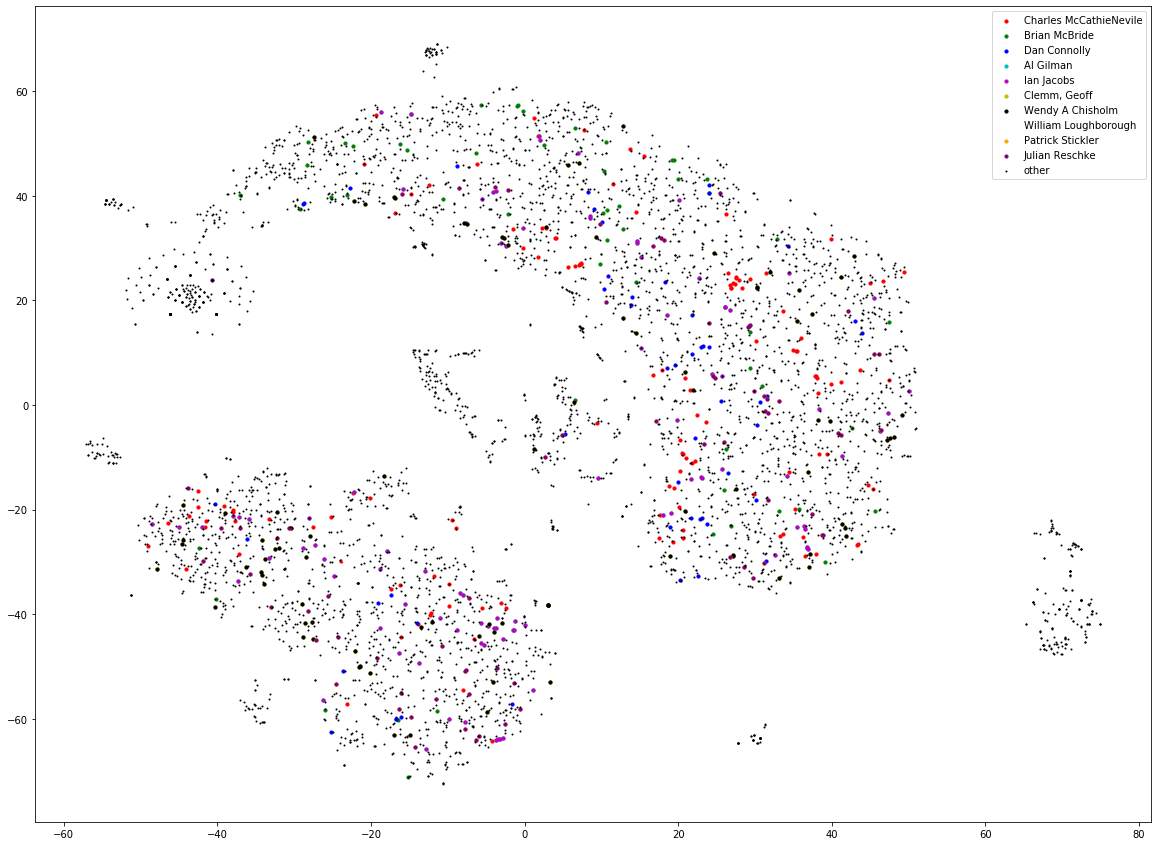

In [22]:
# plt.figure(figsize=(6, 5))
# for i, c, label in zip(target_ids, colors, digits.target_names):
#     plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
# plt.legend()
# plt.show()


# %matplotlib qt

colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
plt.figure(figsize=(20,15))
for (p, i), c in zip(sender_to_inds.items(), colors):
#     print(i)
#     print(vecs_2d[senders_ids == i, 0])
    plt.scatter(vecs_2d[senders_ids == i, 0], vecs_2d[senders_ids == i, 1], c=c, label=p.name, s=10)
    
    
# # everyone else
plt.scatter(vecs_2d[senders_ids == 0, 0], vecs_2d[senders_ids == 0, 1], c="black", label="other", s=1)
plt.legend()

# Factor Analysis

In [7]:
fa = FactorAnalysis(n_components=2, random_state=13) #, verbose=1)

In [8]:
vecs_2d_fa = fa.fit_transform(mails_stacked)

In [10]:
vecs_2d_fa[:10]

array([[-0.74325147, -0.20842786],
       [ 0.66167017, -0.75811867],
       [-0.72536972, -0.29516734],
       [ 0.99692766, -0.03082657],
       [ 1.2834229 , -0.93412699],
       [-0.97237019, -0.0262359 ],
       [-1.31616322,  0.04199602],
       [-0.54148352, -0.06039819],
       [-0.47376388, -0.10649523],
       [-1.15549059, -0.0350698 ]])

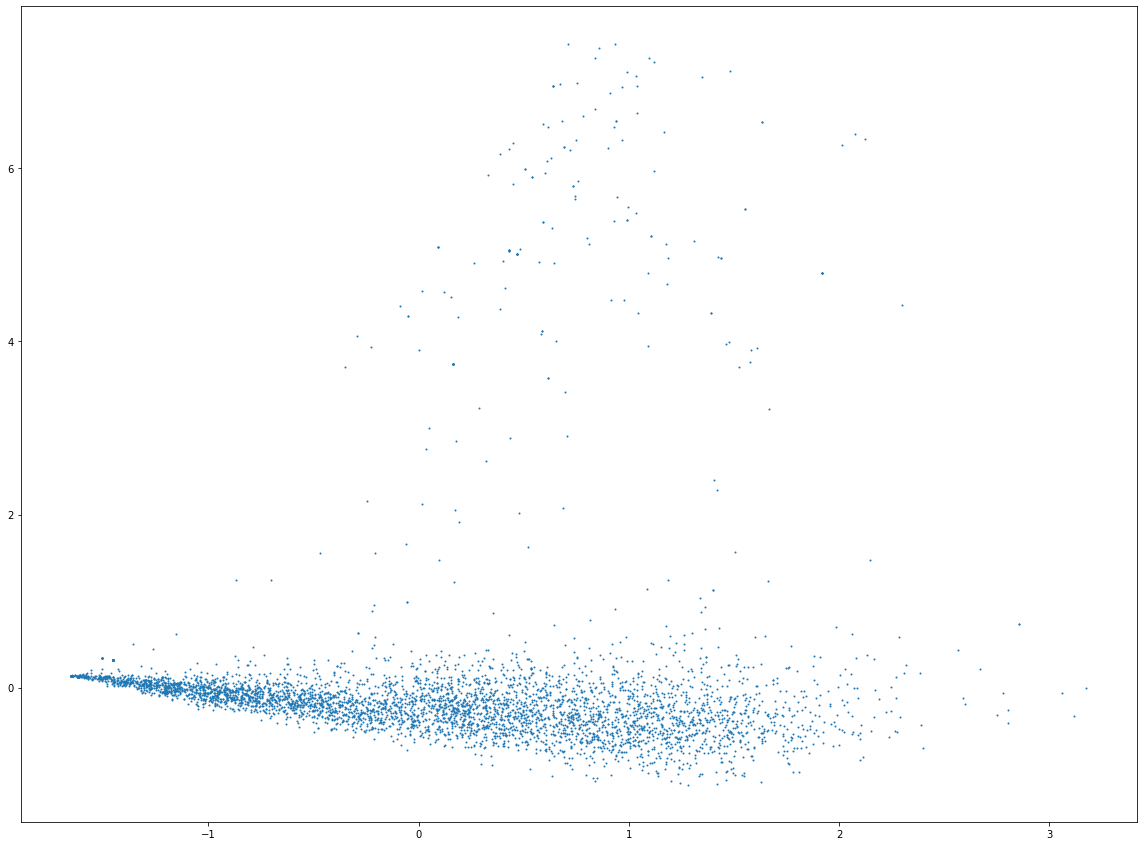

In [13]:
plt.figure(figsize=(20,15))
plt.scatter(vecs_2d_fa[:, 0], vecs_2d_fa[:, 1], s=1)

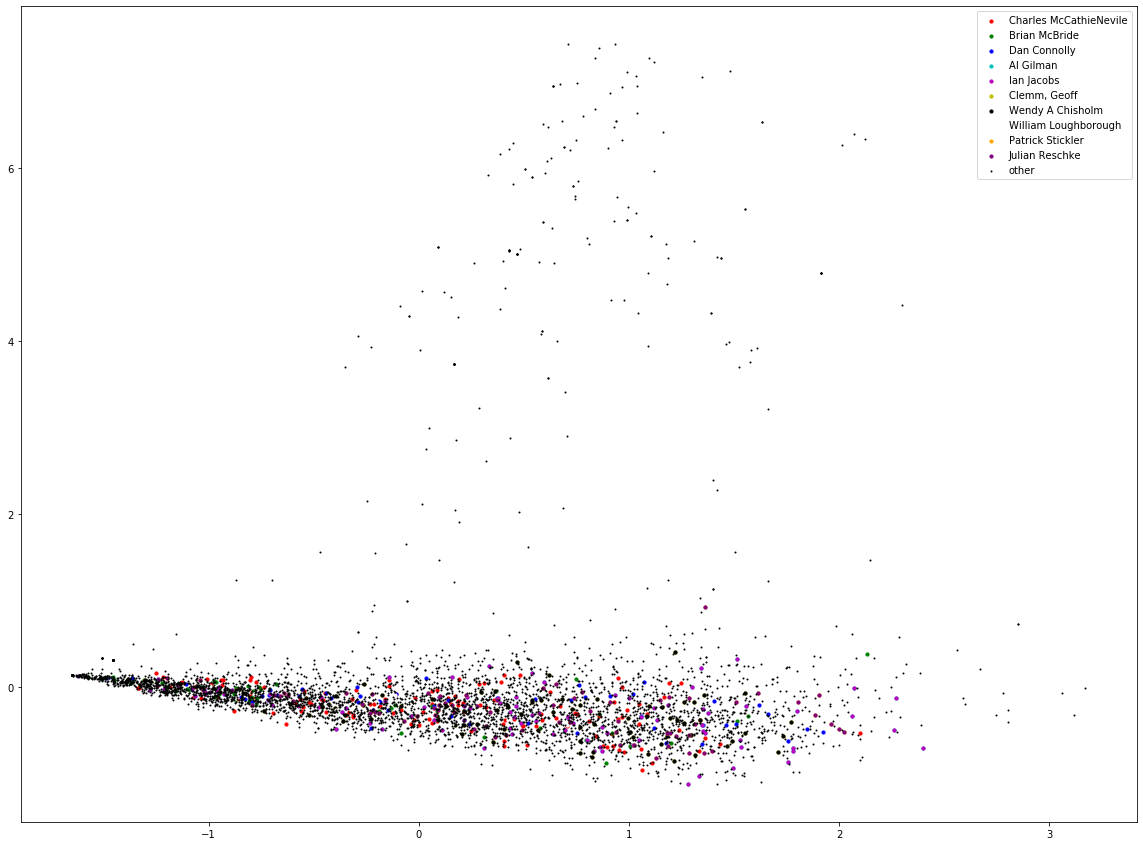

In [16]:
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
plt.figure(figsize=(20,15))
for (p, i), c in zip(sender_to_inds.items(), colors):
#     print(i)
#     print(vecs_2d[senders_ids == i, 0])
    plt.scatter(vecs_2d_fa[senders_ids == i, 0], vecs_2d_fa[senders_ids == i, 1], c=c, label=p.name, s=10)
    
    
# # everyone else
plt.scatter(vecs_2d_fa[senders_ids == 0, 0], vecs_2d_fa[senders_ids == 0, 1], c="black", label="other", s=1)
plt.legend()

# Independent Component Analysis

In [25]:
ica = FastICA(n_components=2, random_state=13)
vecs_2d_ica = ica.fit_transform(mails_stacked)

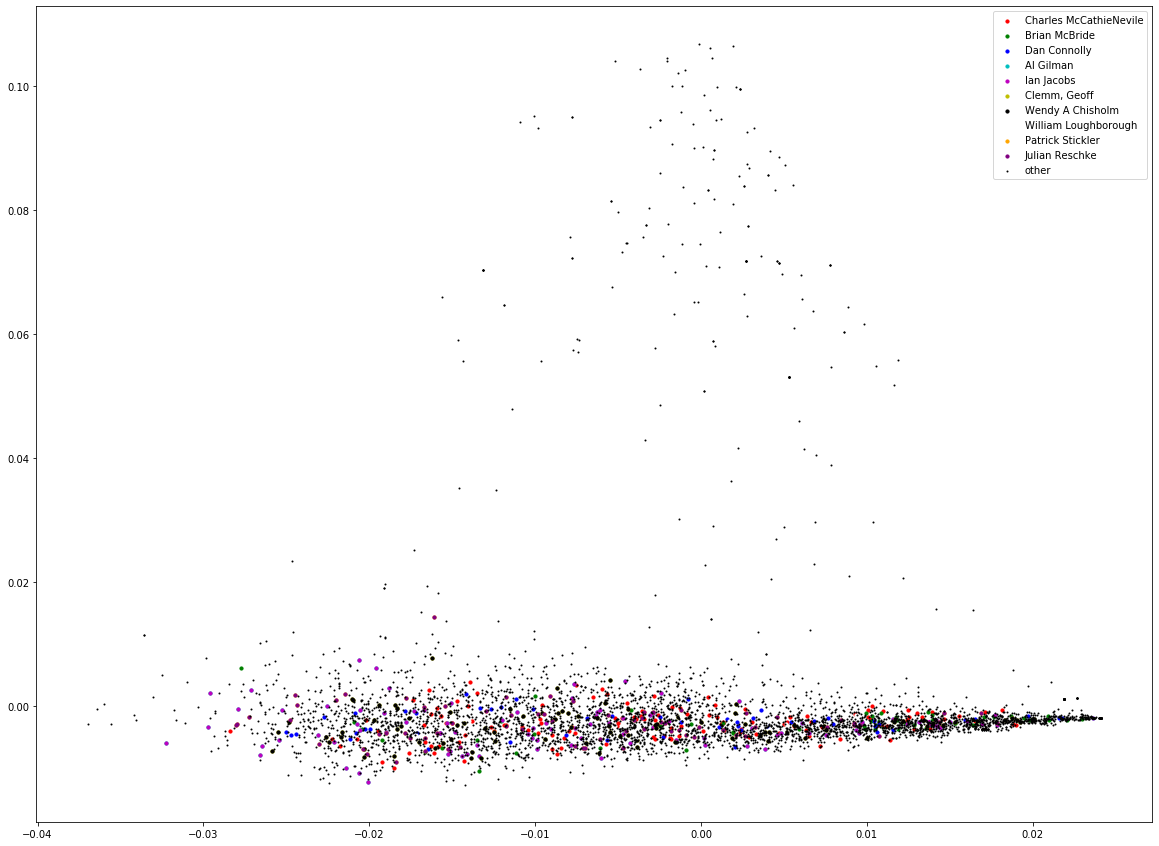

In [26]:
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
plt.figure(figsize=(20,15))
for (p, i), c in zip(sender_to_inds.items(), colors):
#     print(i)
#     print(vecs_2d[senders_ids == i, 0])
    plt.scatter(vecs_2d_ica[senders_ids == i, 0], vecs_2d_ica[senders_ids == i, 1], c=c, label=p.name, s=10)
    
    
# # everyone else
plt.scatter(vecs_2d_ica[senders_ids == 0, 0], vecs_2d_ica[senders_ids == 0, 1], c="black", label="other", s=1)
plt.legend()